## Carga dos dados

In [1]:
import pandas as pd 

In [3]:
temperaturas = pd.read_csv('temps.csv')

In [4]:
temperaturas.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


## Análise Exploratória

In [7]:
print('Dimensões dos dataset temps: ', temperaturas.shape)

Dimensões dos dataset temps:  (348, 9)


In [8]:
temperaturas.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [15]:
print('Quantos dias do ano foram utilizados: ', 348/365 * 100, '%')

Quantos dias do ano foram utilizados:  95.34246575342465 %


In [17]:
temperaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [21]:
from datetime import datetime

years = temperaturas['year']
months = temperaturas['month']
days = temperaturas['day']

# Formato americano para a data: yyyy-mm-dd
dates=[str(year) + '-' + str(month) + '-' + str(day) for year, month, day in zip(years, months, days)]
dates=[datetime.strptime(date, '%Y-%m-%d') for date in dates]

Text(0.5, 1.0, 'Estimada pelo amigo')

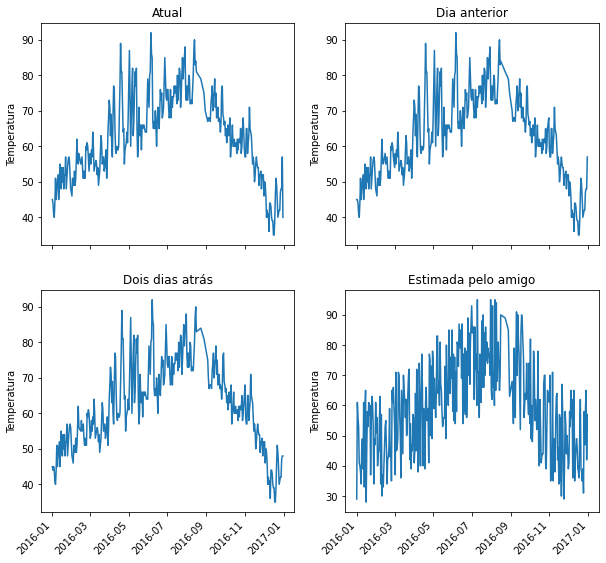

In [33]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.autofmt_xdate(rotation=45)

_ = ax1.plot(dates, temperaturas['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperatura'); ax1.set_title('Atual')

_ = ax2.plot(dates, temperaturas['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperatura'); ax2.set_title('Dia anterior')

_ = ax3.plot(dates, temperaturas['temp_2'])
ax3.set_xlabel(''); ax3.set_ylabel('Temperatura'); ax3.set_title('Dois dias atrás')

_ = ax4.plot(dates, temperaturas['friend'])
ax4.set_xlabel(''); ax4.set_ylabel('Temperatura'); ax4.set_title('Estimada pelo amigo')